<a href="https://colab.research.google.com/github/Daksh0211/C-135/blob/main/C_135.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import files
uploaded = files.upload()

Saving main.csv to main (1).csv


In [30]:
import csv
rows=[]
with open("main.csv","r") as f:
  csvreader = csv.reader(f)
  for row in csvreader:
    rows.append(row)

headers=rows[0]
planet_data_rows=rows[1:]
print(headers)
print(planet_data_rows[0])

['', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']
['0', '11 Comae Berenices b', '305.0', '19.4 Jupiters', '4.74', '2007', 'Gas Giant', '1.08 x Jupiter', '1.29 AU', '326 days', '0.23', '11 Com', 'Radial Velocity', '', '', '12h20m43.03s', '+17d47m34.3s', '4742.0', '2.7', '19.0']


In [31]:
headers[0]="row_num"

solar_system_planet_count={}
for planet_data in planet_data_rows:
  if solar_system_planet_count.get(planet_data[11]):
    solar_system_planet_count[planet_data[11]]+=1

  else:
    solar_system_planet_count[planet_data[11]]=1
max_solar_system=max(solar_system_planet_count,key=solar_system_planet_count.get)
print("solar system {} has maximum planets {} out of all the solar systems we have discovered so far".format(max_solar_system,solar_system_planet_count[max_solar_system]))

solar system KOI-351 has maximum planets 8 out of all the solar systems we have discovered so far


In [32]:
temp_planet_data_rows=list(planet_data_rows)
for planet_data in temp_planet_data_rows:
  planet_mass=planet_data[3]
  if planet_mass.lower()=="unknown":
    planet_data_rows.remove(planet_data)
    continue 
  else:
    planet_mass_value=planet_mass.split(" ")[0]
    planet_mass_ref=planet_mass.split(" ")[1]
    if planet_mass_ref=="Jupiters":
      planet_mass_value=float(planet_mass_value)*317.8
    planet_data[3]=planet_mass_value
  planet_radius=planet_data[7]

  if planet_radius.lower()=="unknown":
    planet_data_rows.remove(planet_data)
    continue 
  else:
    planet_radius_value=planet_radius.split(" ")[0]
    planet_radius_ref=planet_radius.split(" ")[2]
    if planet_radius_ref=="Jupiter":
      planet_radius_value=float(planet_radius_value)*317.8
    planet_data[7]=planet_radius_value

print(len(planet_data_rows))

hd_10180_planets=[]
for planet_data in planet_data_rows:
  if max_solar_system==planet_data[11]:
    hd_10180_planets.append(planet_data)

print(len(hd_10180_planets))
print(hd_10180_planets)

4251
7
[['3665', 'Kepler-903 b', '2704.0', '4.7', '14.615', '2016', 'Super Earth', '2.01', 'Unknown', '10.4 days', '0.0', 'KOI-351', 'Transit', '89.2', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3824', 'KOI-142 b', '1106.0', '9.5', '13.11', '2013', 'Neptune-like', 97.5646, 'Unknown', '10.9 days', '0.06', 'KOI-351', 'Transit', '89.4', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3825', 'KOI-142 c', '1106.0', 214.1972, '13.11', '2013', 'Gas Giant', 397.25, '0.15525 AU', '22.3 days', '0.06', 'KOI-351', 'Transit', '89.68', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3826', 'KOI-1599.01', '3813.0', '4.6', '14.854000000000001', '2019', 'Super Earth', '1.9', '0.14728 AU', '20.4 days', '0.01', 'KOI-351', 'Transit', '89.71', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3827', 'KOI-1599.02', '3813.0', '9', '14.854000000000001', '2019', 'Super Earth', '1.9', '0.112293 AU', '13.6 days', '0.01', 'KOI-351', 'Transit', '89.79'

In [33]:
import plotly.express as px

hd_10180_planets_masses=[]
hd_10180_planets_names=[]
for planet_data in hd_10180_planets:
  hd_10180_planets_masses.append(planet_data[3])
  hd_10180_planets_names.append(planet_data[1])

hd_10180_planets_masses.append(1)
hd_10180_planets_names.append("Earth")

fig=px.bar(x=hd_10180_planets_names,y=hd_10180_planets_masses)
fig.show()

In [34]:
temp_planet_data_rows=list(planet_data_rows)
for planet_data in temp_planet_data_rows:
  if planet_data[1].lower()=="hd 100546 b":
    planet_data_rows.remove(planet_data) 
planet_masses=[]
planet_radiuses=[]
planet_names=[]

for planet_data in planet_data_rows:
  planet_masses.append(planet_data[3])
  planet_names.append(planet_data[1])
  planet_radiuses.append(planet_data[7])
planet_gravity=[]
for index,name in enumerate(planet_names):
  gravity=(float(planet_masses[index])*5.972e+24)/(float(planet_radiuses[index])*float(planet_radiuses[index])*6371000*6371000)*6.674e-11
  planet_gravity.append(gravity)

fig=px.scatter(x=planet_radiuses,y=planet_masses,size=planet_gravity,hover_data=[planet_names])
fig.show()

In [35]:
low_gravity_planets=[]
for index,gravity in enumerate(planet_gravity):
  if gravity<10:
    low_gravity_planets.append(planet_data_rows[index])

print(len(low_gravity_planets))

2839


c 132

In [36]:
low_gravity_planets=[]
for index,gravity in enumerate(planet_gravity):
  if gravity<100:
    low_gravity_planets.append(planet_data_rows[index])

print(len(low_gravity_planets))

4209


In [37]:
print(headers)

['row_num', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']


In [38]:
planet_type_values=[]
for planet_data in planet_data_rows:
  planet_type_values.append(planet_data[6])
print(list(set(planet_type_values)))

['Super Earth', 'Gas Giant', 'Neptune-like', 'Terrestrial']


In [39]:
planet_masses=[]
planet_radiuses=[]
for planet_data in low_gravity_planets:
  planet_masses.append(planet_data[3])
  planet_radiuses.append(planet_data[7])

fig=px.scatter(x=planet_radiuses,y=planet_masses)
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



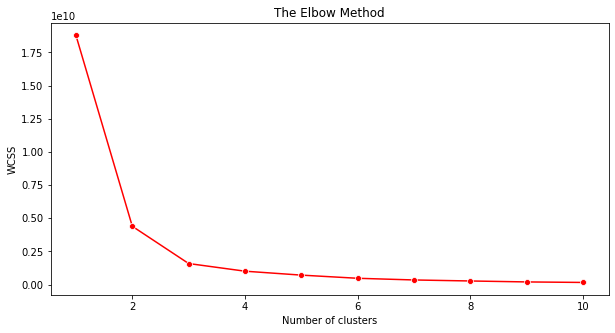

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

X=[]
for index,planet_mass in enumerate(planet_masses):
  temp_list=[
             planet_radiuses[index],
             planet_mass
  ]
  X.append(temp_list)
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11),wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
planet_masses=[]
planet_radiuses=[]
planet_types=[]

for planet_data in low_gravity_planets:
  planet_masses.append(planet_data[3])
  planet_radiuses.append(planet_data[7])
  planet_types.append(planet_data[6])  
  
fig=px.scatter(x=planet_radiuses,y=planet_masses,color=planet_types)
fig.show()

In [42]:
suitable_planets=[]
for planet_data in low_gravity_planets:
  if planet_data[6].lower()=="terrestrial" or planet_data[6].lower()=="super earth":
    suitable_planets.append(planet_data)
print(len(suitable_planets))


1453


C-133

In [43]:
print(headers)

['row_num', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']


In [44]:
temp_suitable_planets = list(suitable_planets)
for planet_data in temp_suitable_planets:
  if planet_data[8].lower() == "unknown":
    suitable_planets.remove(planet_data)

for planet_data in suitable_planets:
  if planet_data[9].split(" ")[1].lower() == "days":
    planet_data[9] = float(planet_data[9].split(" ")[0]) #Days
  else:
    planet_data[9] = float(planet_data[9].split(" ")[0])*365 #Years
  planet_data[8] = float(planet_data[8].split(" ")[0])

orbital_radiuses = []
orbital_periods = []
for planet_data in suitable_planets:
  orbital_radiuses.append(planet_data[8])
  orbital_periods.append(planet_data[9])

fig = px.scatter(x=orbital_radiuses, y=orbital_periods)
fig.show()


In [45]:
goldilock_planets=list(suitable_planets)
temp_goldilock_planets=list(suitable_planets)
for planet_data in temp_goldilock_planets:
  if planet_data[8] < 0.38 or planet_data[8] > 2:
    goldilock_planets.remove(planet_data)
print(len(suitable_planets))
print(len(goldilock_planets))

697
25


In [46]:
planet_speeds=[]
for planet_data in suitable_planets:
  distance=2 * 3.14 * (planet_data[8] * 1.496e+9)
  time=planet_data[9] * 86400
  speed=distance/time
  planet_speeds.append(speed)

speed_supporting_planets=list(suitable_planets)

temp_speed_supporting_planets=list(suitable_planets)
for index,planet_data in enumerate(temp_speed_supporting_planets):
  if planet_speeds[index]>200 : 
    speed_supporting_planets.remove(planet_data)

print(len(speed_supporting_planets))

8


C-134

In [47]:
habitable_planets=[]
for planet in speed_supporting_planets:
  if planet in goldilock_planets:
    habitable_planets.append(planet)
print(len(habitable_planets))

6


In [48]:
final_dict={}
for index,planet_data in enumerate(planet_data_rows):
  features_list=[]
  gravity=(float(planet_data[3])*5.972e+24)/(float(planet_data[7])*float(planet_data[7])*6371000*6371000)*6.674e+1
  try:
    if gravity<100:
      features_list.append("gravity")
  except:pass
  try:
    if planet_data[6].lower()=="terrestrial" or planet_data[6].lower()=="super earth":
      features_list.append("planet_type")
  except:pass
  try: 
    if planet_data[8]>0.38 or planet_data[8]<2:
      features_list.append('goldilock')
  except:pass
  try:
    distance=2*3.14*(planet_data[8]*1.496e+9)
    time=planet_data[9]*86400
    speed=distance/time
    if speed<200:
      features_list.append("speed")
  except:pass
  final_dict[index]=features_list
  
print(final_dict)

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: ['planet_type', 'goldilock'], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: [], 54: [], 55: [], 56: [], 57: [], 58: [], 59: [], 60: [], 61: [], 62: [], 63: [], 64: [], 65: [], 66: [], 67: [], 68: [], 69: [], 70: [], 71: [], 72: [], 73: [], 74: [], 75: [], 76: [], 77: [], 78: [], 79: [], 80: [], 81: [], 82: [], 83: [], 84: [], 85: [], 86: [], 87: [], 88: [], 89: [], 90: [], 91: [], 92: [], 93: [], 94: [], 95: [], 96: [], 97: [], 98: [], 99: [], 100: [], 101: [], 102: ['planet_type', 'goldilock'], 103: [], 104: [], 105: [], 106: [], 107: [], 108: [], 109: [], 110: [], 111: [], 112: [], 113: ['planet_type', 'goldilock'], 114: 

C-135

In [49]:
gravity_planet_count=0
for key,value in final_dict.items():
  if "gravity" in value:
    gravity_planet_count+=1
print(gravity_planet_count)

0


In [50]:
type_planet_count=0
for key,value in final_dict.items():
  if "planet_type" in value:
    type_planet_count+=1
print(type_planet_count)

1485


In [51]:
goldilock_planet_count=0
for key,value in final_dict.items():
  if "goldilock" in value:
    goldilock_planet_count+=1
print(goldilock_planet_count)

697


In [52]:
planet_not_gravity_support=[]
for planet_data in planet_data_rows:
  if planet_data not in low_gravity_planets:
    planet_not_gravity_support.append(planet_data)

type_no_gravity_planet_count=0
for planet_data in planet_not_gravity_support:
  if planet_data[6].lower()=="terrestrial" or planet_data[6].lower()=="super earth":
    type_no_gravity_planet_count+=1
print(type_no_gravity_planet_count)
print(type_planet_count-type_no_gravity_planet_count)    


32
1453


In [53]:
goldilock_planet_count=0
for key,value in final_dict.items():
  if "goldilock" in value:
    goldilock_planet_count+=1
print(goldilock_planet_count)

697


In [54]:
speed_planet_count=0
for key,value in final_dict.items():
  if "speed" in value:
    speed_planet_count+=1
print(speed_planet_count)

8


In [55]:
final_dict={}
for index,planet_data in enumerate(planet_data_rows):
  features_list=[]
  gravity=(float(planet_data[3])*5.972e+24)/(float(planet_data[7])*float(planet_data[7])*6371000*6371000)*6.674e+1
  try:
    if gravity<100:
      features_list.append("gravity")
  except:pass
  try:
    if planet_data[6].lower()=="terrestrial" or planet_data[6].lower()=="super earth":
      features_list.append("planet_type")
  except:pass
  try: 
    if planet_data[8]>0.38 or planet_data[8]<2:
      features_list.append('goldilock')
  except:pass
  try:
    distance=2*3.14*(planet_data[8]*1.496e+9)
    time=planet_data[9]*86400
    speed=distance/time
    if speed<200:
      features_list.append("speed")
  except:pass
  final_dict[index]=features_list
  
print(final_dict)

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: ['planet_type', 'goldilock'], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: [], 54: [], 55: [], 56: [], 57: [], 58: [], 59: [], 60: [], 61: [], 62: [], 63: [], 64: [], 65: [], 66: [], 67: [], 68: [], 69: [], 70: [], 71: [], 72: [], 73: [], 74: [], 75: [], 76: [], 77: [], 78: [], 79: [], 80: [], 81: [], 82: [], 83: [], 84: [], 85: [], 86: [], 87: [], 88: [], 89: [], 90: [], 91: [], 92: [], 93: [], 94: [], 95: [], 96: [], 97: [], 98: [], 99: [], 100: [], 101: [], 102: ['planet_type', 'goldilock'], 103: [], 104: [], 105: [], 106: [], 107: [], 108: [], 109: [], 110: [], 111: [], 112: [], 113: ['planet_type', 'goldilock'], 114: 

In [56]:
goldilock_planet_count=0
for key,value in final_dict.items():
  if "goldilock" in value:
    goldilock_planet_count+=1
print(goldilock_planet_count)

697


In [57]:
speed_planet_count=0
for key,value in final_dict.items():
  if "speed" in value:
    speed_planet_count+=1
print(speed_planet_count)

8


In [58]:
goldilock_gravity_type_count=0
for key,value in final_dict.items():
  if "goldilock" in value and "planet_type" in value and "gravity" in value:
    goldilock_gravity_type_count+=1
print(goldilock_gravity_type_count)

0


In [60]:
speed_goldilock_gravity_type_count=0
for key,value in final_dict.items():
  if "goldilock" in value and "planet_type" in value and "gravity" in value and "speed" in value:
    speed_goldilock_gravity_type_count+=1
print(speed_goldilock_gravity_type_count)

0


In [63]:
final_dict = {}

for index, planet_data in enumerate(planet_data_rows):
  features_list = []
  gravity = (float(planet_data[3])*5.972e+24) / (float(planet_data[7])*float(planet_data[7])*6371000*6371000) * 6.674e-11
  try:
    if gravity < 100:
      features_list.append("gravity")
  except: pass
  try:
    if planet_data[6].lower() == "terrestrial" or planet_data[6].lower() == "super earth":
      features_list.append("planet_type")
  except: pass
  try:
    if float(planet_data[8].split(" ")[0]) > 0.38 and float(planet_data[8].split(" ")[0]) < 2:
      features_list.append("goldilock")
  except: 
    try:
      if planet_data[8] > 0.38 and planet_data[8] < 2:
        features_list.append("goldilock")
    except: pass
  try:
    try:
      distance = 2 * 3.14 * (float(planet_data[8].split(" ")[0]) * 1.496e+9)
    except:
      try:
        distance = 2 * 3.14 * (float(planet_data[8]) * 1.496e+9)
      except: pass
    try:
      time, unit = planet_data[9].split(" ")[0], planet_data[9].split(" ")[1]
      if unit.lower() == "days":
        time = float(time)
      else:
        time = float(time) * 365
    except:
      time = planet_data[9]
    time = time * 86400
    speed = distance / time
    if speed < 200:
      features_list.append("speed")
  except: pass
  final_dict[planet_data[1]] = features_list

print(final_dict)

{'11 Comae Berenices b': ['gravity', 'goldilock'], '11 Ursae Minoris b': ['gravity', 'goldilock'], '14 Andromedae b': ['gravity', 'goldilock'], '14 Herculis b': ['gravity', 'speed'], '16 Cygni B b': ['gravity', 'goldilock'], '18 Delphini b': ['gravity'], '1RXS J160929.1-210524 b': ['gravity', 'speed'], '24 Bootis b': ['gravity'], '24 Sextantis b': ['gravity', 'goldilock'], '24 Sextantis c': ['gravity'], '2MASS J01033563-5515561 AB b': ['gravity', 'speed'], '2MASS J01225093-2439505 b': ['gravity', 'speed'], '2MASS J02192210-3925225 b': ['gravity', 'speed'], '2MASS J04414489+2301513 b': ['gravity', 'speed'], '2MASS J12073346-3932539 b': ['gravity', 'speed'], '2MASS J19383260+4603591 b': ['gravity', 'goldilock'], '2MASS J21402931+1625183 A b': ['gravity', 'speed'], '2MASS J22362452+4751425 b': ['gravity', 'speed'], '30 Arietis B b': ['gravity', 'goldilock'], '42 Draconis b': ['gravity', 'goldilock'], '47 Ursae Majoris b': ['gravity'], '47 Ursae Majoris c': ['gravity', 'speed'], '47 Ursae 

In [64]:
goldilock_gravity_type_count=0
for key,value in final_dict.items():
  if "goldilock" in value and "planet_type" in value and "gravity" in value:
    goldilock_gravity_type_count+=1
print(goldilock_gravity_type_count)

24


In [65]:
speed_goldilock_gravity_type_count=0
for key,value in final_dict.items():
  if "goldilock" in value and "planet_type" in value and "gravity" in value and "speed" in value:
    speed_goldilock_gravity_type_count+=1
print(speed_goldilock_gravity_type_count)

6
